### Import 

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import ast
from wordcloud import WordCloud

In [84]:
def import_data():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    return train, test
    

In [136]:
train, test = import_data()

In [132]:
def extract_from_str(df, column):
    df[column] = df[column].apply(lambda x: 0 if pd.isna(x) else ast.literal_eval(x))

### Belong_to_collection

In [137]:
extract_from_str(train, 'belongs_to_collection')

In [134]:
train['belongs_to_collection'].head(10)

0    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1    [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                    0
3                                                    0
4                                                    0
5                                                    0
6                                                    0
7                                                    0
8    [{'id': 256377, 'name': 'The Muppet Collection...
9                                                    0
Name: belongs_to_collection, dtype: object

In [135]:
def if_belongs_with_id(df):  
    df['if_collection'] = df['belongs_to_collection'].map(lambda x: 0 if x == 0 else 1)
    df['id_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if x == 0 else x[0]['id'])



In [138]:
if_belongs_with_id(train)

In [139]:
train[['belongs_to_collection', 'if_collection', 'id_collection']].head(10)

,belongs_to_collection,if_collection,id_collection
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",1,313576
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",1,107674
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,"[{'id': 256377, 'name': 'The Muppet Collection...",1,256377
9,0,0,0


In [140]:
def count_collection(df):
    max = train['id_collection'].value_counts().max()
    count_df = df['id_collection'].value_counts(sort=False).apply(lambda x: 0 if x == max else x)
    count_dic = count_df.to_dict()
    df['quantity_collection'] = df['id_collection'].map(count_dic)
    df.drop(['belongs_to_collection','id_collection'], axis=1, inplace = True)

In [126]:
count_collection(train)

<AxesSubplot:xlabel='quantity_collection', ylabel='count'>

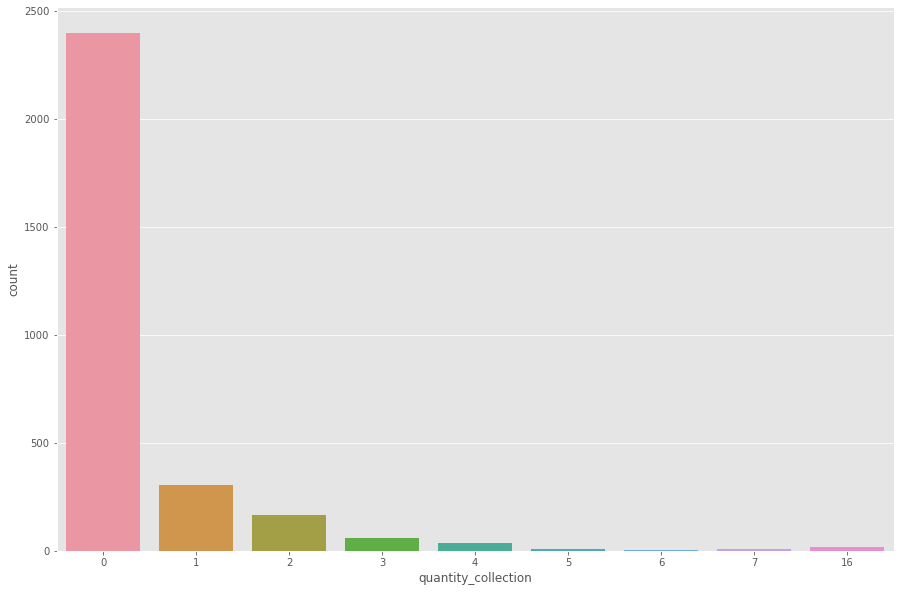

In [127]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'quantity_collection', data = train)

In [128]:
train[['if_collection','quantity_collection']].head(10)

,if_collection,quantity_collection
0,1,1
1,1,2
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,2
9,0,0


In [129]:
train.corr()['revenue']

id                     0.000610
budget                 0.752965
popularity             0.461460
runtime                0.216380
revenue                1.000000
if_collection          0.339425
quantity_collection    0.291476
Name: revenue, dtype: float64

In [ ]:
#collection -> sprawdzić razem z latami 

### Original language

<AxesSubplot:xlabel='original_language', ylabel='count'>

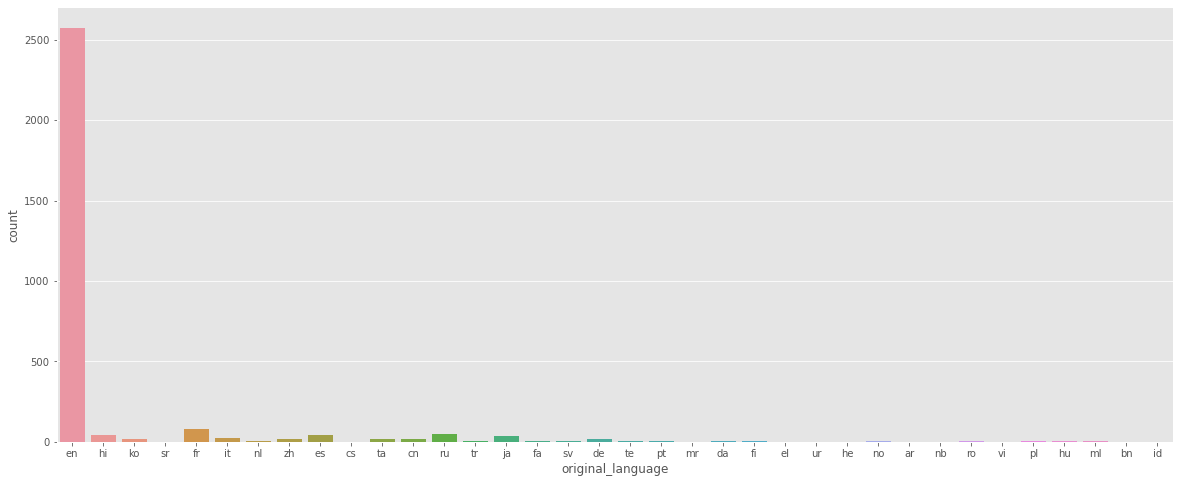

In [82]:
plt.figure(figsize=(20, 8))
sns.countplot(x = 'original_language', data = train)

In [49]:
def if_lang_eng(df):
    df['language_eng'] = df['original_language'].map(lambda x: 1 if x == 'en' else 0)


In [52]:
if_lang_eng(train)

In [53]:
train[['language_eng','original_language']].head(10)

,language_eng,original_language
0,1,en
1,1,en
2,1,en
3,0,hi
4,0,ko
5,1,en
6,1,en
7,1,en
8,1,en
9,1,en


<AxesSubplot:xlabel='language_eng', ylabel='count'>

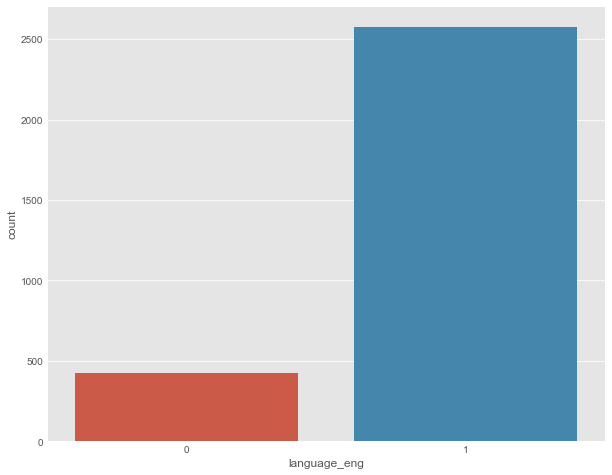

In [55]:
plt.figure(figsize=(10, 8))
sns.countplot(x = 'language_eng', data = train)

### Genres

In [155]:
train, test = import_data()
extract_from_str(train, 'genres')

In [159]:
train['list_genres'] = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
train[['genres', 'list_genres']].head(10)

,genres,list_genres
0,"[{'id': 35, 'name': 'Comedy'}]",[Comedy]
1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Family, Romance]"
2,"[{'id': 18, 'name': 'Drama'}]",[Drama]
3,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...","[Thriller, Drama]"
4,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...","[Action, Thriller]"
5,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...","[Animation, Adventure, Family]"
6,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...","[Horror, Thriller]"
7,"[{'id': 99, 'name': 'Documentary'}]",[Documentary]
8,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...","[Action, Comedy, Music, Family, Adventure]"
9,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...","[Comedy, Music]"


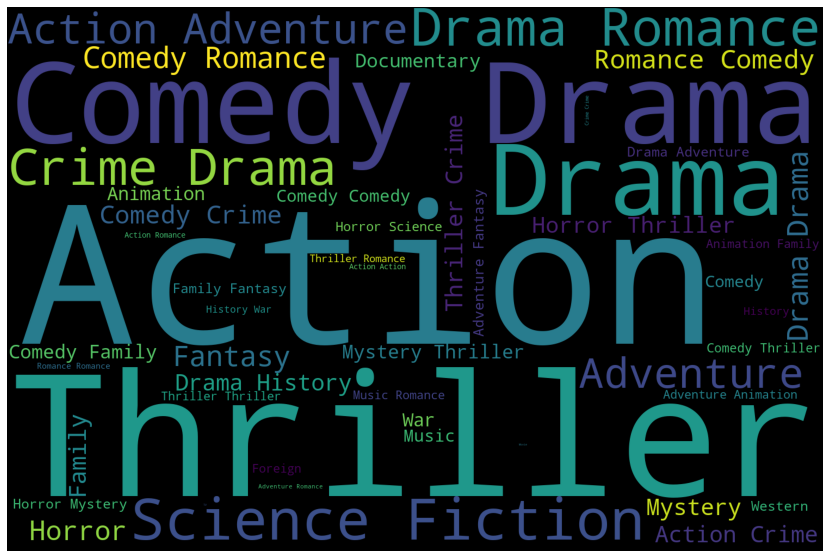

In [160]:
plt.figure(figsize = (15,10))
text = ' '.join([x for i in train['list_genres'] for x in i])
wc = WordCloud(width=1500, height=1000).generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [149]:
count_type_genres = pd.Series([x for i in train['list_genres'] for x in i]).value_counts()

<AxesSubplot:>

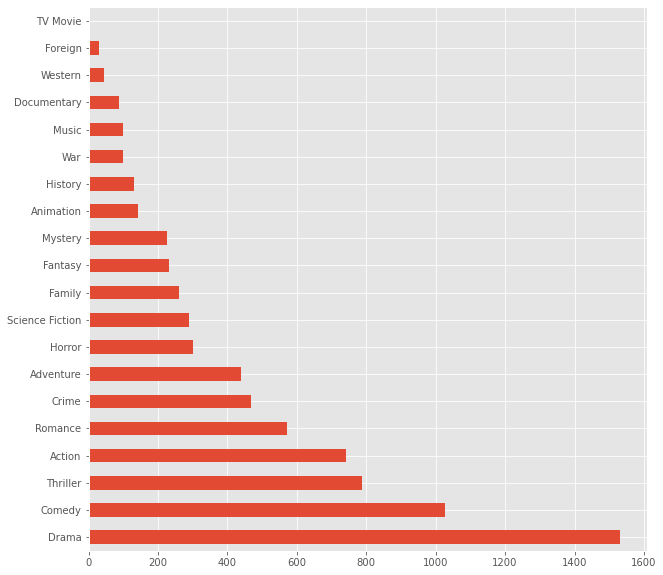

In [164]:
plt.figure(figsize=(10,10))
count_type_genres.plot(kind='barh')

In [162]:
train['count_genres'] = train['list_genres'].apply(lambda x: len(x))
train[['genres', 'list_genres','count_genres']].head(10)

,genres,list_genres,count_genres
0,"[{'id': 35, 'name': 'Comedy'}]",[Comedy],1
1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Family, Romance]",4
2,"[{'id': 18, 'name': 'Drama'}]",[Drama],1
3,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...","[Thriller, Drama]",2
4,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...","[Action, Thriller]",2
5,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...","[Animation, Adventure, Family]",3
6,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...","[Horror, Thriller]",2
7,"[{'id': 99, 'name': 'Documentary'}]",[Documentary],1
8,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...","[Action, Comedy, Music, Family, Adventure]",5
9,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...","[Comedy, Music]",2


<AxesSubplot:xlabel='count_genres', ylabel='count'>

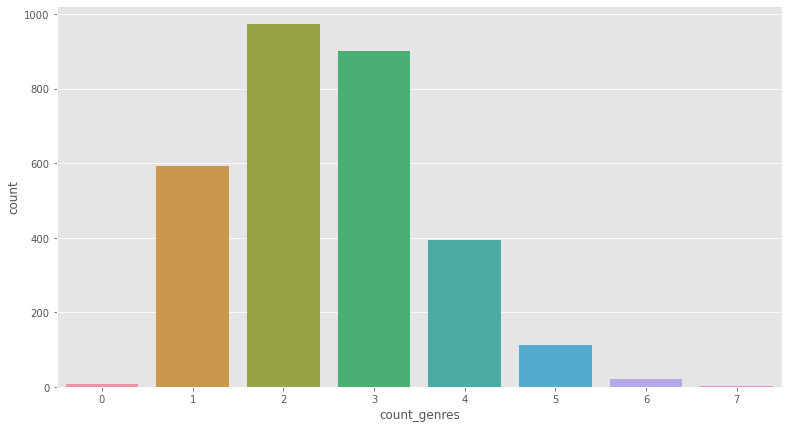

In [166]:
plt.figure(figsize=(13,7))
sns.countplot(x = 'count_genres', data = train)

### Koniec

In [154]:
# :)